# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



K-means clustering merupakan algoritma tipe unsupervised learning yang digunkaan untuk menglempokkan dataset yang belum diberikan label ke dalam kluster yang berbeda. Cara kerja dari k-means clustering yaitu memilih beberapa titik data awal (k) secara acak, lalu memindahkan data sesuai dengan kelompok yang paling ideal.

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [4]:
# code di sini
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [5]:
#handling missing value
df.ffill(inplace=True)

<Axes: xlabel='Umur'>

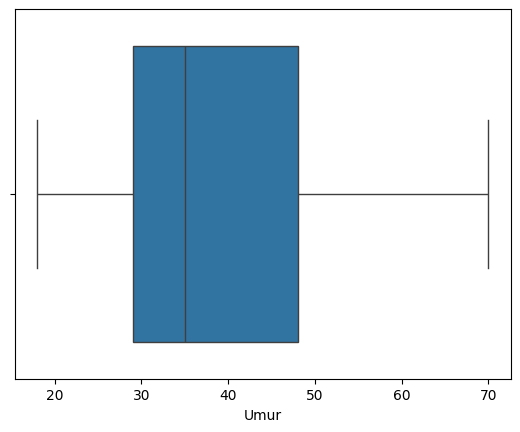

In [6]:
#handling outlier
def hapus_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_akhir=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_akhir

df_hapus_outlier=hapus_outlier_IQR(df[['Umur', 'Skor Belanja (1-100)']])
df_hapus_outlier.dropna(axis=0, inplace=True)
sns.boxplot(x='Umur', data=df_hapus_outlier)

In [7]:
#rescaling data
sc = StandardScaler()
df_outlier_std= sc.fit_transform(df_hapus_outlier.astype(float))

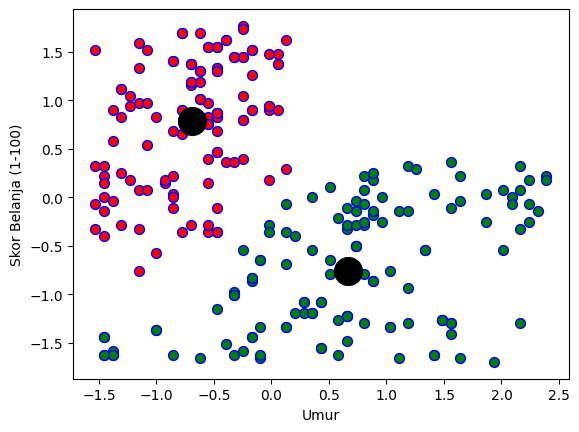

In [8]:
#clustering with kmeans
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_outlier_std)
labels1 = kmeans1.labels_

new_df_outlier_std= pd.DataFrame(data=df_outlier_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_df_outlier_std['label_kmeans1'] = labels1

plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans1 == 0], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans1 == 0], c='green', s=50, edgecolor='blue', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans1 == 1], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans1 == 1], c='red', s=50, edgecolor='blue', linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

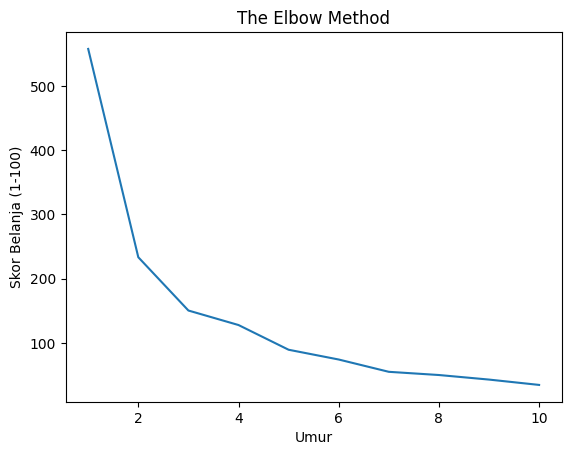

In [9]:
#Elbow method
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(new_df_outlier_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [10]:
#clustering K=3
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_outlier_std)
kmeans2.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 1], dtype=int32)

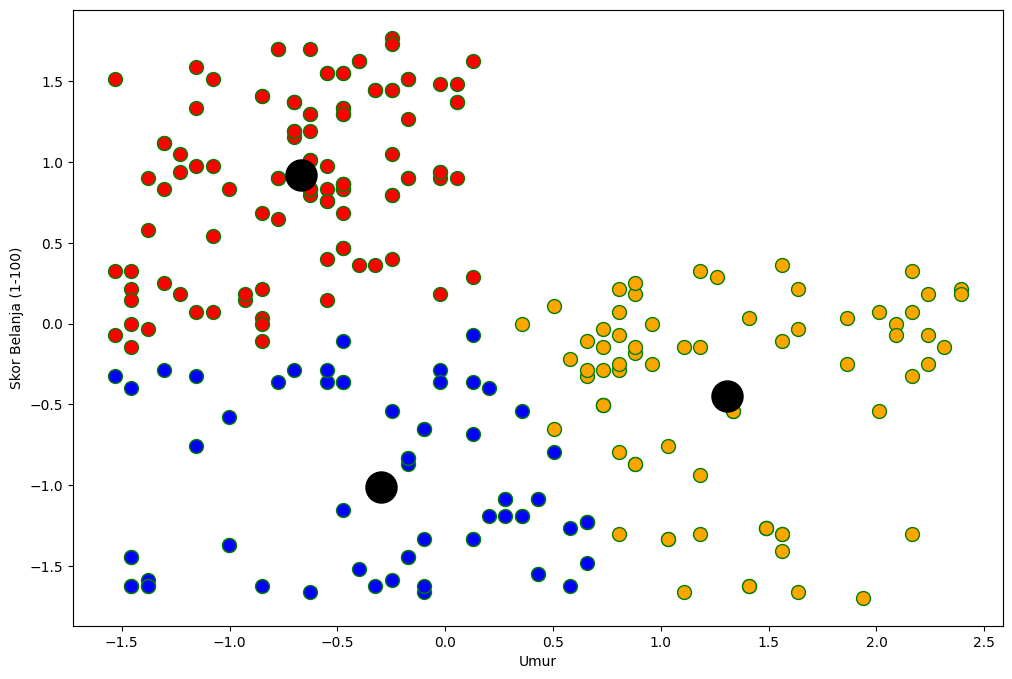

In [11]:
labels2 = kmeans2.labels_
new_df_outlier_std['label_kmeans2']= labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 0], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 0], 
            c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 1], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 1], 
            c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 2], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 2], 
            c='orange', s=100, edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [12]:
#menghitung silhoutte coefficient
print(silhouette_score(new_df_outlier_std, labels=labels1))
print(silhouette_score(new_df_outlier_std, labels=labels2))

0.4721409103444199
0.6011705604960424


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket.

Jawab disini: 1. Berdasarkan klustering grafik 1 dapat diambil kesimpulan segmentasi pelanggan berdasarkan umur terhadap skor belanja yaitu terdapat 2 kluster biru dan merah. Kluster biru dapat diambil kesimpulan sebagai segmentasi usia muda memiliki skor belanja sedang hingga tingi (data cenderung tidak begitu menyebar). Sedangkan, kluster merah dapat diambil kseimpulan sebagai segmentasi usia menengah memiliki skor belanja rendah dan usia tua memiliki skor belanja sedang (data cenderung menyebar).
2. Berdasarkan klustering grafik 2 dapat diambil kesimpulan segmentasi pelanggan berdasarkan umur terhadap skor belanja yaitu terdaoat 3 kluster merah, biru, dan kuning. Pertama, kluster merah merupakan segmentasi usia muda dengan skor belanja sedang hingga tinggi. Kedua, kluster biru merupakan segmentasi usia mudah hingga menengah dengan skor belanja rendah. Ketiga, kluster kuning merupakan segmentasi usia menengah hingga tua dengan skor belanja rendah hingga sedang.

Dapat disimpulkan dari kedua grafik segmentasi tersebut bahwa skor belanja tertinggi didominasi oleh usia muda sehingga untuk mencapai kemajuan supermarket, maka usia muda harus dijadikan target promosi untuk meningkatkan penjualan. 